In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

from keras.models import load_model
from keras.callbacks import TensorBoard
from datetime import datetime, timedelta
from utilities_activity6 import *
from utilities_activity7 import *
np.random.seed(0)

In [2]:
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

In [3]:
train.head()

,date,iso_week,open,high,low,close,volume,market_capitalization,close_point_relative_normalization,volume_point_relative_normalization
0,2016-01-01,2016-00,430.72,436.25,427.51,434.33,36278900.0,6.473530e+09,0.000000,0.000000
1,2016-01-02,2016-00,434.62,436.06,431.87,433.44,30096600.0,6.533630e+09,-0.002049,-0.170410
2,2016-01-03,2016-01,433.58,433.74,424.71,430.01,39633800.0,6.519500e+09,0.000000,0.000000
3,2016-01-04,2016-01,430.06,434.52,429.08,433.09,38477500.0,6.468180e+09,0.007163,-0.029175
4,2016-01-05,2016-01,433.07,434.18,429.68,431.96,34522600.0,6.515380e+09,0.004535,-0.128961


In [4]:
test.head()

,date,iso_week,open,high,low,close,volume,market_capitalization,close_point_relative_normalization,volume_point_relative_normalization
0,2017-06-25,2017-26,2607.25,2682.26,2552.12,2589.41,1.161100e+09,4.278380e+10,0.000000,0.000000
1,2017-06-26,2017-26,2590.57,2615.25,2376.29,2478.45,1.663280e+09,4.251400e+10,-0.042851,0.432504
2,2017-06-27,2017-26,2478.45,2552.45,2332.99,2552.45,1.489790e+09,4.067790e+10,-0.014274,0.283085
3,2017-06-28,2017-26,2553.03,2603.98,2484.42,2574.79,1.183870e+09,4.190670e+10,-0.005646,0.019611
4,2017-06-29,2017-26,2567.56,2588.83,2510.48,2539.32,9.499790e+08,4.215030e+10,-0.019344,-0.181828


In [5]:
train_data = create_groups(
    train['close_point_relative_normalization'][2:].values)

test_data = create_groups(
    test['close_point_relative_normalization'][:-3].values)

In [6]:
train_data

array([[[ 0.        ,  0.00716262,  0.00453478, -0.00209297,
          0.06520779,  0.05399874,  0.04092928],
        [ 0.        ,  0.00098216, -0.02745597, -0.03486685,
         -0.03946517, -0.18674524, -0.13493605],
        [ 0.        ,  0.01273869, -0.00562386,  0.09921528,
          0.07313628,  0.00049699,  0.01357573],
        [ 0.        , -0.0278929 , -0.02685063, -0.01985259,
         -0.05628211, -0.058317  , -0.06134452],
        [ 0.        ,  0.01163327,  0.01540255,  0.00319983,
          0.05645795,  0.04821433,  0.02101581],
        [ 0.        , -0.00841697, -0.00156657,  0.01335564,
          0.00804524,  0.0202857 ,  0.04046519],
        [ 0.        , -0.01728753,  0.00063846,  0.02232154,
          0.03717801,  0.03329814,  0.07349655],
        [ 0.        , -0.00239289, -0.0411577 , -0.03156335,
         -0.03249772, -0.01515497, -0.01431176],
        [ 0.        ,  0.00968858,  0.00373702, -0.02193772,
         -0.02733564, -0.05204152, -0.07596309],
        [ 

In [7]:
test_data

array([[[ 0.00000000e+00, -4.28514604e-02, -1.42735218e-02,
         -5.64607382e-03, -1.93441749e-02, -4.19284702e-02,
         -5.98051294e-02],
        [ 0.00000000e+00,  2.29765367e-02,  3.79697343e-02,
          3.81093729e-02,  4.07305892e-02,  4.86341349e-03,
          2.58810199e-02],
        [ 0.00000000e+00, -5.79247471e-02, -7.17309128e-02,
         -4.74897159e-02, -6.37458109e-02, -1.13205000e-01,
         -2.06310256e-01],
        [ 0.00000000e+00,  1.54724275e-01,  2.01604295e-01,
          1.78052875e-01,  4.60032542e-01,  3.82387995e-01,
          4.56156533e-01],
        [ 0.00000000e+00,  8.95839437e-03, -5.63726926e-02,
         -7.35972751e-02, -2.14693818e-02,  2.87906534e-02,
         -1.44667448e-03],
        [ 0.00000000e+00,  4.28553812e-02, -1.41158720e-02,
         -1.68686847e-02,  1.72458817e-02,  5.03086487e-02,
          1.79796023e-01],
        [ 0.00000000e+00,  5.13388551e-02,  6.40957827e-02,
          3.99914124e-02,  5.20669334e-02,  1.35870614e-01

In [8]:
X_train, Y_train = split_lstm_input(train_data)

In [9]:
X_train, Y_train

(array([[[ 0.        ,  0.00716262,  0.00453478, -0.00209297,
           0.06520779,  0.05399874,  0.04092928],
         [ 0.        ,  0.00098216, -0.02745597, -0.03486685,
          -0.03946517, -0.18674524, -0.13493605],
         [ 0.        ,  0.01273869, -0.00562386,  0.09921528,
           0.07313628,  0.00049699,  0.01357573],
         [ 0.        , -0.0278929 , -0.02685063, -0.01985259,
          -0.05628211, -0.058317  , -0.06134452],
         [ 0.        ,  0.01163327,  0.01540255,  0.00319983,
           0.05645795,  0.04821433,  0.02101581],
         [ 0.        , -0.00841697, -0.00156657,  0.01335564,
           0.00804524,  0.0202857 ,  0.04046519],
         [ 0.        , -0.01728753,  0.00063846,  0.02232154,
           0.03717801,  0.03329814,  0.07349655],
         [ 0.        , -0.00239289, -0.0411577 , -0.03156335,
          -0.03249772, -0.01515497, -0.01431176],
         [ 0.        ,  0.00968858,  0.00373702, -0.02193772,
          -0.02733564, -0.05204152, -0.075

In [10]:
def train_model(model, X, Y, epochs, version, run_number):
   
    model_name = f'bitcoin_lstm_v{version}_run_{run_number}'
    tensorboard = TensorBoard(log_dir=f'./logs/{model_name}')

    model_history = model.fit(
        x=X, y=Y,
        batch_size=1, epochs=epochs,
        shuffle=False)

    return model_history

In [11]:
model = load_model('bitcoin_lstm_v0.h5')

In [12]:
model_history = train_model(model=model,
                            X=X_train, Y=Y_train,
                            epochs=100,
                            version=0, run_number=0)

Epoch 1/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 9.4879e-04
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.0897e-04
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8591e-04
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 5.7667e-04
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 4.7957e-04
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 3.9360e-04
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 3.1814e-04
Epoch 13/100
1/1 [===============

1/1 [==============================] - 0s 998us/step - loss: 9.2524e-06
Epoch 100/100
1/1 [==============================] - 0s 2ms/step - loss: 6.2713e-06


In [13]:
combined_set = np.concatenate((train_data, test_data), axis=1)

In [14]:
evaluated_weeks = []
for i in range(0, test_data.shape[1]):
    input_series = combined_set[0:, i:i + 77]

    X_test = input_series[0:, :-1].reshape(1, input_series.shape[1] - 1, 7)
    Y_test = input_series[0:, -1:][0]

    result = model.evaluate(x=X_test, y=Y_test, verbose=0)
    evaluated_weeks.append(result)

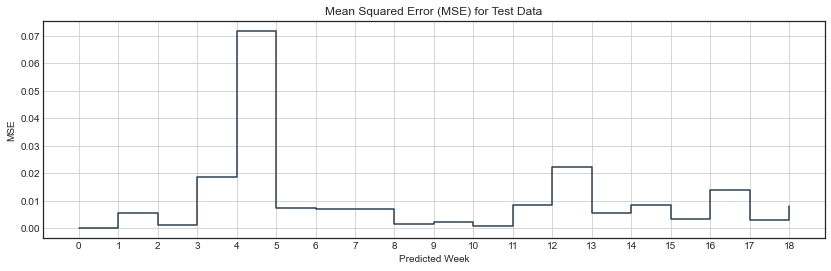

In [15]:
ax = pd.Series(evaluated_weeks).plot(drawstyle="steps-post",
                                     figsize=(14, 4),
                                     color='#2c3e50',
                                     grid=True,
                                     title='Mean Squared Error (MSE) for Test Data')

ax.set_xticks(range(0, len(evaluated_weeks)))
ax.set_xlabel("Predicted Week")
ax.set_ylabel("MSE")
plt.show()

In [16]:
predicted_weeks = []
for i in range(0, test_data.shape[1]):
    input_series = combined_set[0:, i:i + 76]
    predicted_weeks.append(model.predict(input_series))

In [17]:
predicted_days = []
for week in predicted_weeks:
    predicted_days += list(week[0])

In [18]:
last_day = datetime.strptime(train['date'].max(), '%Y-%m-%d')
list_of_days = []
for days in range(1, len(predicted_days) + 1):
    D = (last_day + timedelta(days=days)).strftime('%Y-%m-%d')
    list_of_days.append(D)

In [19]:
predicted = pd.DataFrame({
    'date': list_of_days,
    'close_point_relative_normalization': predicted_days
})
predicted.head()

,date,close_point_relative_normalization
0,2017-06-25,-0.001086
1,2017-06-26,0.017974
2,2017-06-27,0.070154
3,2017-06-28,0.057628
4,2017-06-29,0.058922


In [20]:
predicted['date'] = predicted['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))

test['date'] = test['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))

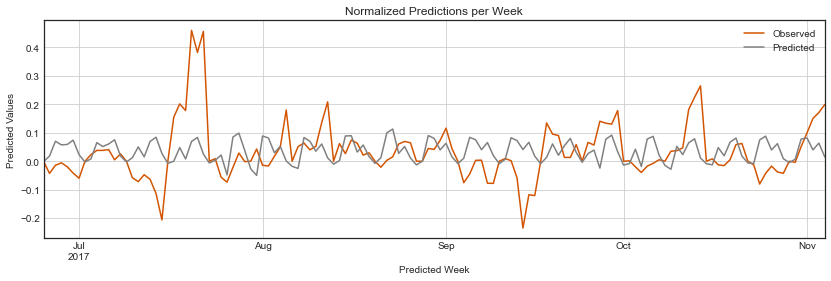

In [21]:
plot_two_series(A=test[:-3],
                B=predicted,
                variable='close_point_relative_normalization',
                title='Normalized Predictions per Week')

In [22]:
predicted['iso_week'] = predicted['date'].apply(
    lambda x: x.strftime('%Y-%U'))

In [23]:
def denormalize(reference, series,
                normalized_variable='close_point_relative_normalization',
                denormalized_variable='close'):
    week_values = reference[reference['iso_week'] == series['iso_week'].values[0]]
    last_value = week_values[denormalized_variable].values[0]
    series[denormalized_variable] = last_value * (series[normalized_variable] + 1)

    return series

In [24]:
predicted_close = predicted.groupby('iso_week').apply(
    lambda x: denormalize(test[:-3], x))

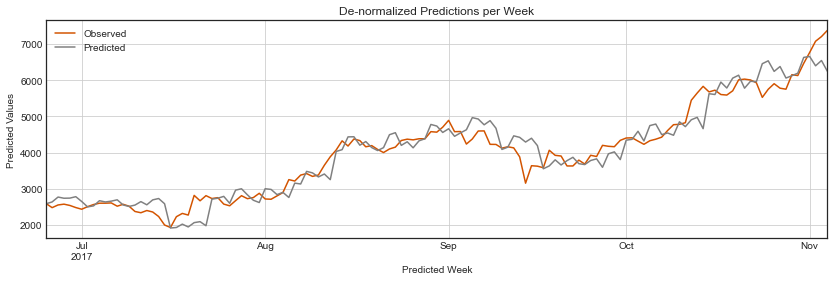

In [25]:
plot_two_series(A=test[:-3],
                B=predicted_close,
                variable='close',
                title='De-normalized Predictions per Week')

In [26]:
A = test[:-3]['close_point_relative_normalization']
B = predicted_close['close_point_relative_normalization']

print(f'Normalized RMSE: {rmse(A, B):.2f}')

Normalized RMSE: 0.10


In [27]:
A = test[:-3]['close']
B = predicted_close['close']

print(f'De-normalized RMSE: {rmse(A, B):.2f}')
print(f'De-normalized MAPE: {mape(A, B):.2f}')

De-normalized RMSE: 360.34
De-normalized MAPE: 6.83
